# Step-1 Data Reading and  Understanding

### Data Reading 

In [173]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#To perform K-means clustering

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [174]:
#read the dataset
ngo_df=pd.read_csv("Country-data.csv",sep=",", encoding="ISO-8859-1", header=0)
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [175]:
#Converting the percentage data  to numerical form data
ngo_df['exports'] = ngo_df['exports']*ngo_df['gdpp']/100
ngo_df['imports'] = ngo_df['imports']*ngo_df['gdpp']/100
ngo_df['health'] = ngo_df['health']*ngo_df['gdpp']/100

- The features export, imports, health were the percentsge of gdpp so we got the value of those columns for further analysis .

In [176]:
#checking the data types of the dataset
ngo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [177]:
#checking the dataset from the statistical point of view
ngo_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [178]:
#checking the shape of the dataset
ngo_df.shape

(167, 10)

# Step-2 Data cleaning 

In [179]:
#checking the null values
ngo_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No null values present in the dataset is what we can see from the above after checking the null values

In [180]:
#we will check the duplicate values
#ngo_df[ngo_df.duplicated(subset=["country"],keep=False)].sum()
country = ngo_df["country"]
country[country.duplicated()].sum()

0

No dupliacte rows in the dataset

The dataset looks clean so we are not cleaning the data as of now but we will now visualise the data followed by checking the outliers

# Step-3 Data Visualisation

In [181]:
#checking the data again
ngo_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Univariate analysis

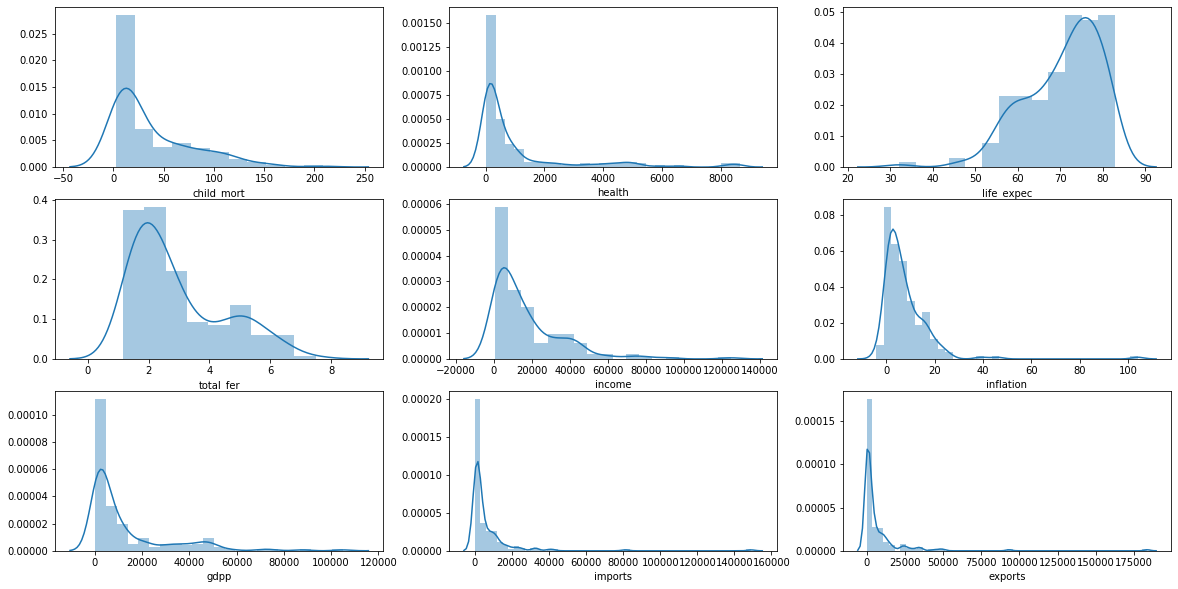

In [182]:
#checking the variable od the dataset and trying to analyse it 
fig, axs = plt.subplots(3,3, figsize = (20,10))
plt1 = sns.distplot(ngo_df['child_mort'], ax = axs[0,0])
plt2 = sns.distplot(ngo_df['health'], ax = axs[0,1])
plt3 = sns.distplot(ngo_df['life_expec'], ax = axs[0,2])
plt4 = sns.distplot(ngo_df['total_fer'], ax = axs[1,0])
plt5 = sns.distplot(ngo_df['income'], ax = axs[1,1])
plt6 = sns.distplot(ngo_df['inflation'], ax = axs[1,2])
plt7 = sns.distplot(ngo_df['gdpp'], ax = axs[2,0])
plt8 =sns.distplot(ngo_df['imports'], ax = axs[2,1])
plt9 = sns.distplot(ngo_df['exports'], ax = axs[2,2])

- We can see that we are not able to make any such reference from the data apart from the features like income ,gdpp ,total fer and child mort as we see some variation in the data in these ,so I can use them for my cluster profiling purpose ie. gdpp,income,child mort

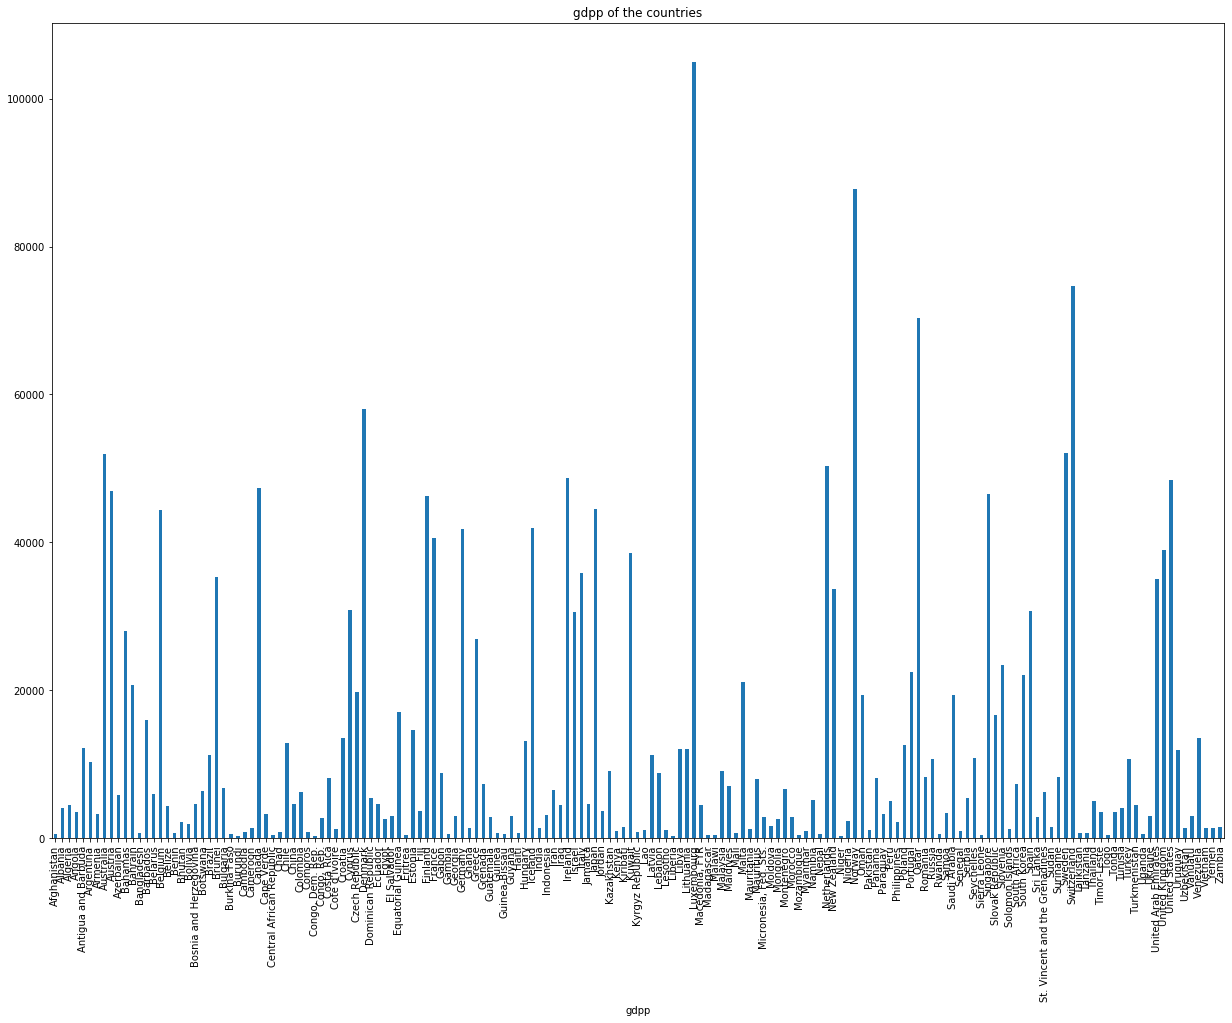

In [183]:
#analysing the gdpp of the countries 
fig = plt.figure(figsize = (21,15))
ngo_df.set_index('country').gdpp.plot.bar()
plt.title("gdpp of the countries")
plt.xticks(rotation=90)
plt.xlabel('gdpp')
plt.show()

- we observe from the above dataset that we have many countries with high and many at low gdpp. Luxembourg shows the highest gdpp 

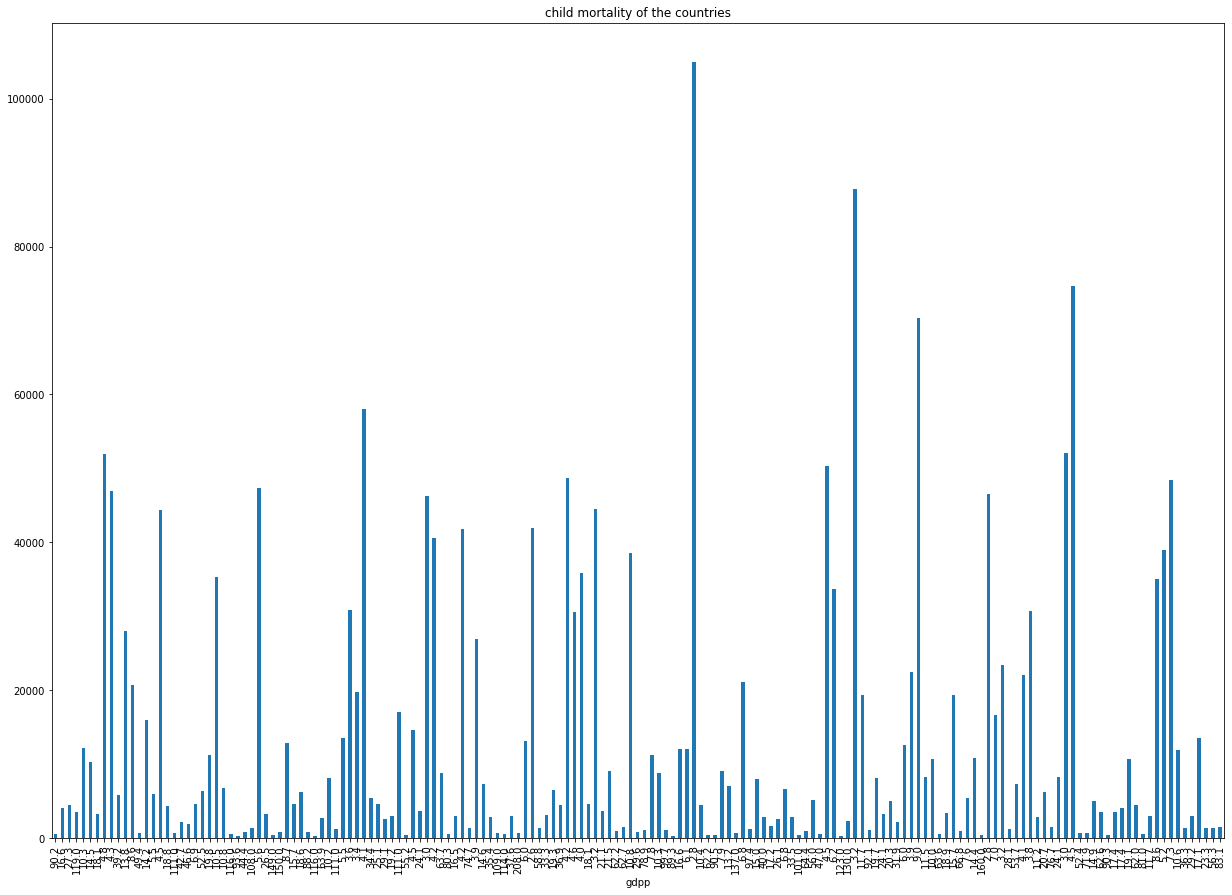

In [184]:
#analysing the gdpp of the countries 
fig = plt.figure(figsize = (21,15))
ngo_df.set_index('child_mort').gdpp.plot.bar()
plt.title("child mortality of the countries")
plt.xticks(rotation=90)
plt.xlabel('gdpp')
plt.show()

- we can see there are some countries having high child mortality and few low child mortality rate countries  so we can get good clusters and to finally get the countries who are in dired need or aid.

### Bivariate analysis

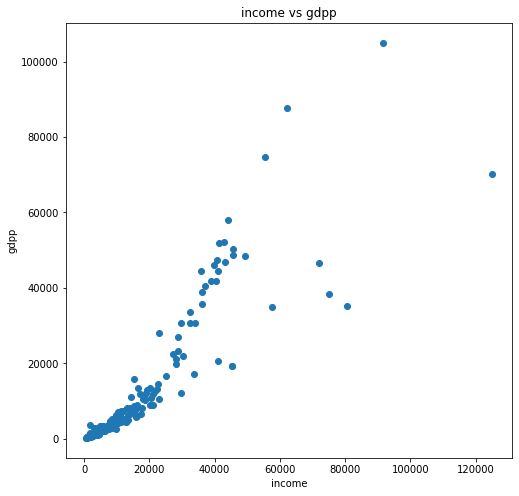

In [185]:
#checking the relationship between the gdpp and the income 
fig = plt.figure(figsize = (8,8))
plt.scatter(ngo_df.income,ngo_df.gdpp)
plt.xlabel('income')
plt.title("income vs gdpp")
plt.ylabel('gdpp')
plt.show()

we do see that there are variables which has high gdpp with the high income and thus causing the outliers 

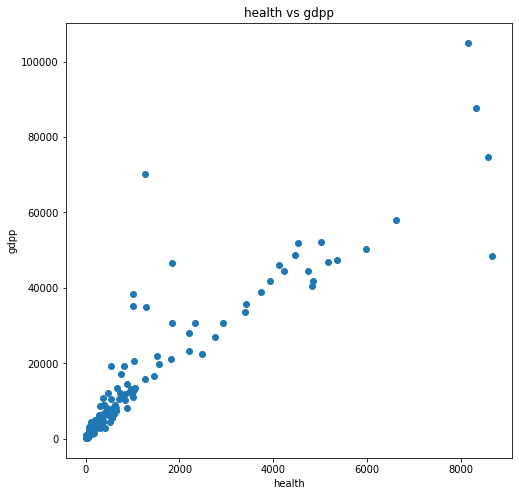

In [186]:
#checking the relationship between the gdpp and the income 
fig = plt.figure(figsize = (8,8))
plt.scatter(ngo_df.health,ngo_df.gdpp)
plt.xlabel('health')
plt.ylabel('gdpp')
plt.title("health vs gdpp")
plt.show()

we can see the countires having very less gdpp have very low health 

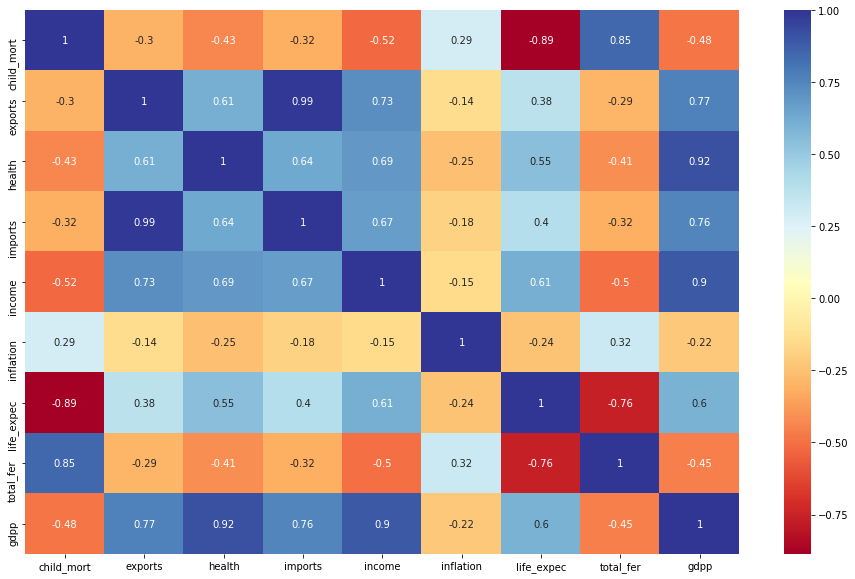

In [187]:
# Let's check the correlation coefficients of the  variables 

plt.figure(figsize = (16, 10))
sns.heatmap(ngo_df.corr(), annot = True, cmap="RdYlBu")
plt.show()

- The gdpp and the income had the high correlation
- Even the child_mort and the total_fer also shows high correaltion
- The life_exp and the gdpp also shows a good correlation between each other
- The child_mort and the life_fer shows high  negative correlation with each other

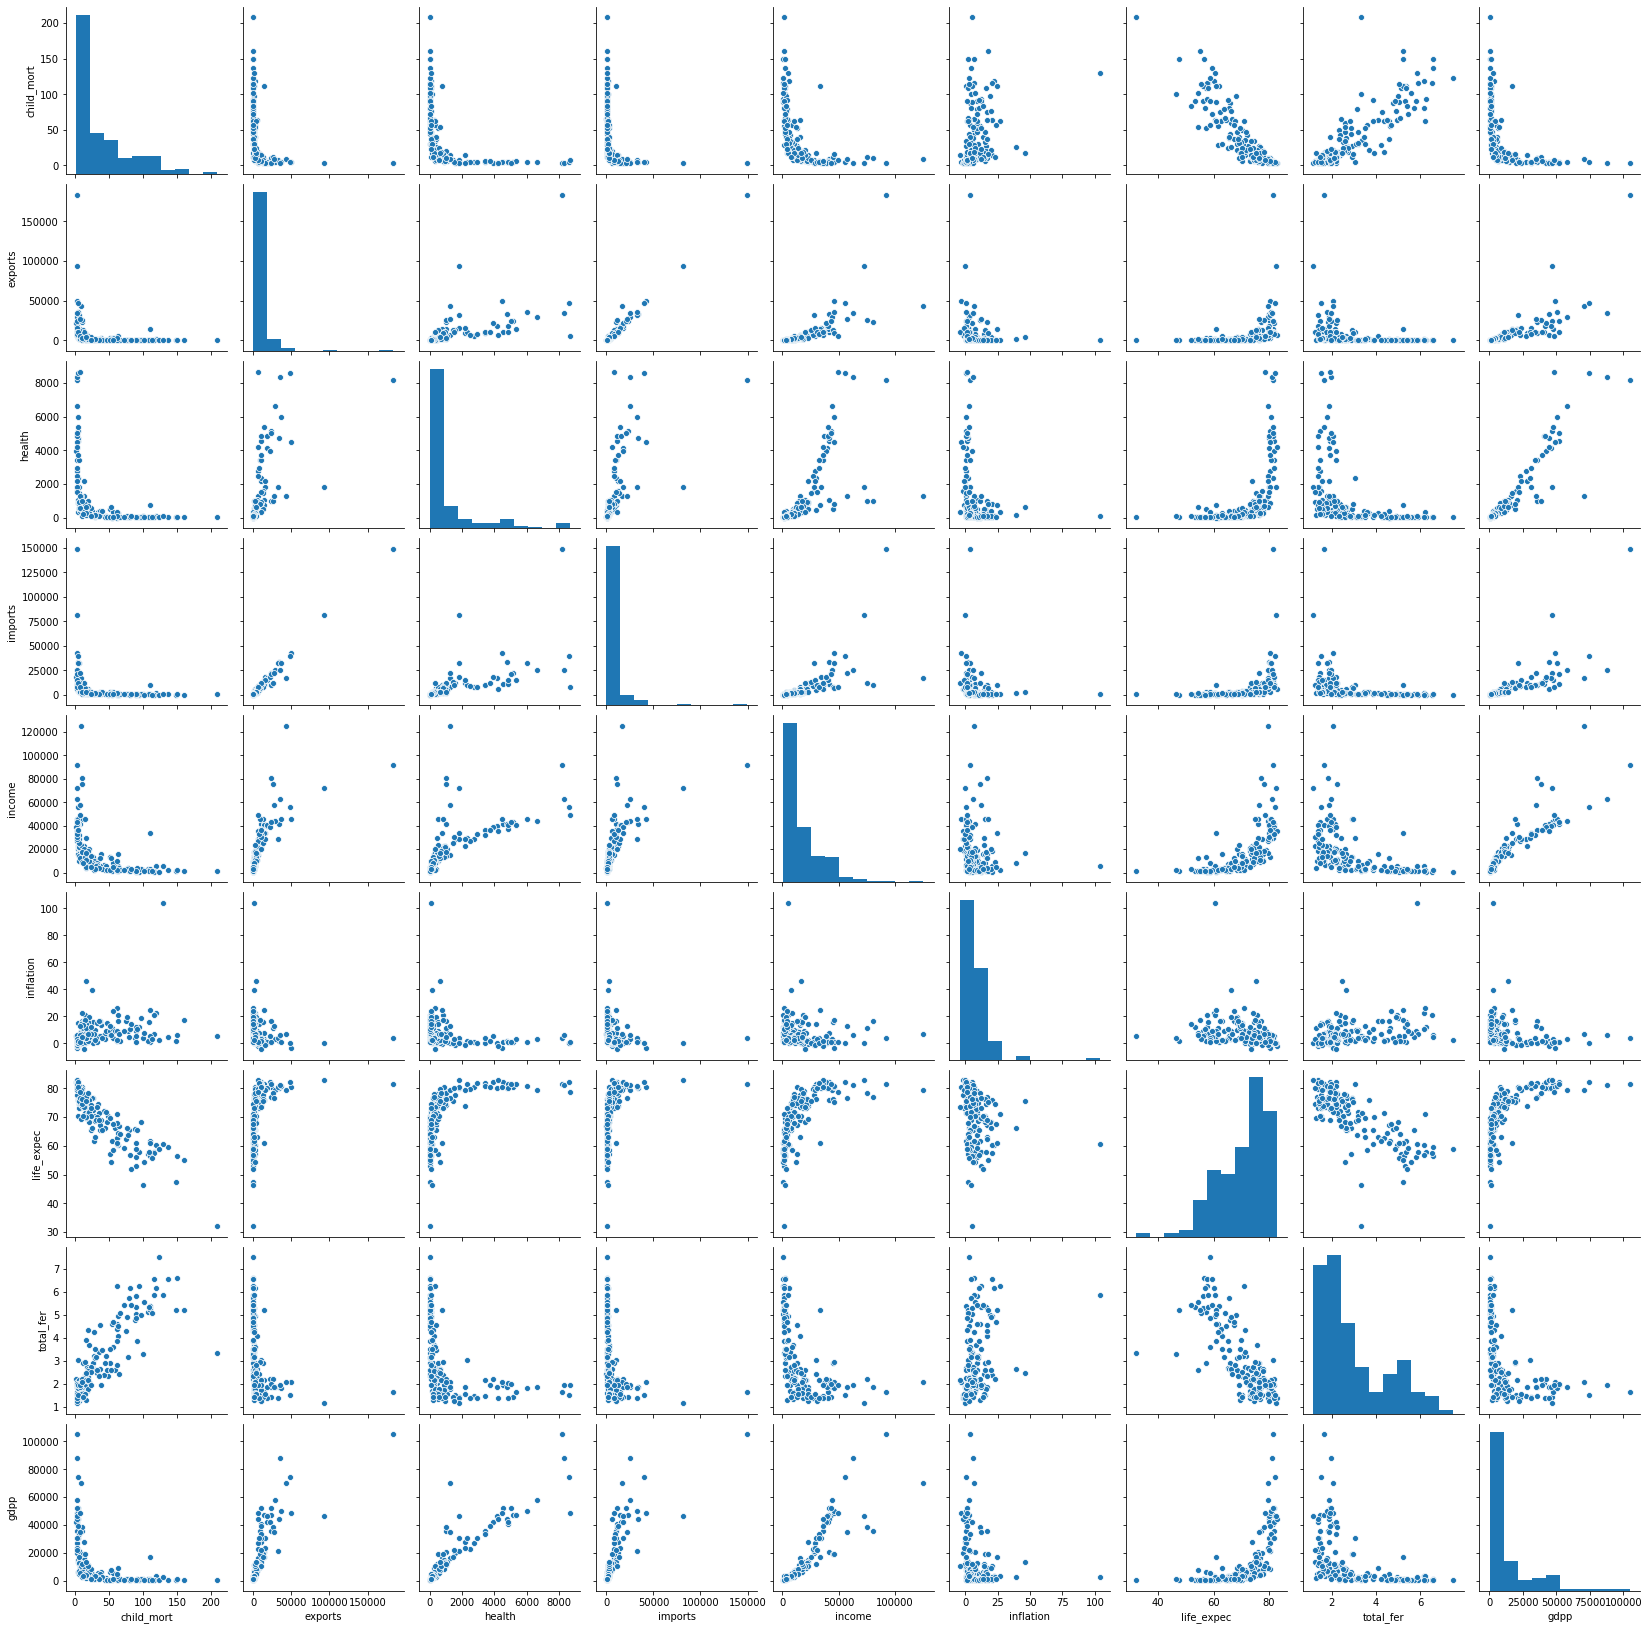

In [188]:
#checking the numerical features with the help of pairplot 
sns.pairplot(ngo_df)
plt.show()

# STEP-4 Outliers treatment

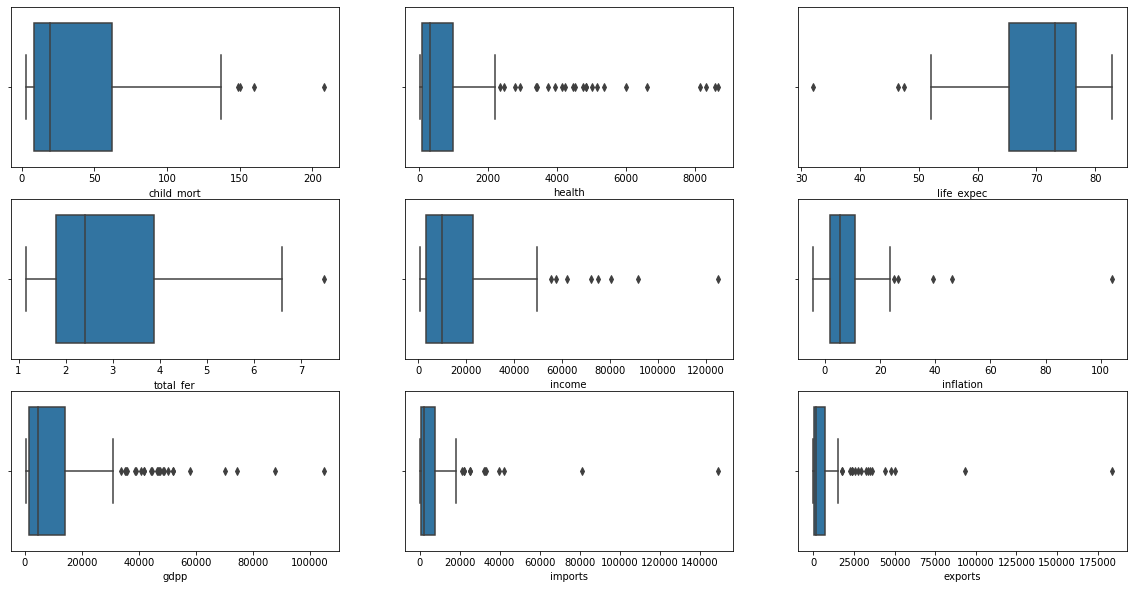

In [189]:
#checking the outliers in the  dataset and trying to analyse it 
fig, axs = plt.subplots(3,3, figsize = (20,10))
plt1 = sns.boxplot(ngo_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(ngo_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(ngo_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(ngo_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(ngo_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(ngo_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(ngo_df['gdpp'], ax = axs[2,0])
plt8 =sns.boxplot(ngo_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(ngo_df['exports'], ax = axs[2,2])

- Since my data is less I will not go for removing the data from the dataset.
- Outlier capping is one option 
- but we will not treat for all those features those who have outliers below the range as we may loose the pattern of the data and may not get the desired output(except child mort) . 
- we can however treat the child mortality outliers in the lower range but as we see the feature shows outliers in the higher range we will not touch it as it shows that the countries with high child mortality rate is in need of the aid so we will not cap or we may loose those countries .
### In short 

- dont treat upper range in the child mortality but can treat the lower range outliers in the child mortality.
- For other feature treat the upper range outliers dont treat the lower range outliers (except child mortality)

LETS NOW DEFINE THE RANGE IN WHICH WE WILL PERFORM THE OUTLIERS CAPPING:
- 1-99: Soft range
- 5-95: mid range
- 25-75:Harsh range/Hard range
- If we use the Harsh range we  might end up by changing a lot of data  

In [190]:
ngo_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [191]:
#outlier treatment  on the features with the outlier in the upper range export 
Q1=ngo_df.exports.quantile(0.01)
Q4=ngo_df.exports.quantile(0.99)

#statistical treatment for the outliers
ngo_df['exports'][ngo_df['exports']<=Q1]=Q1
ngo_df['exports'][ngo_df['exports']>=Q4]=Q4

#statistical treatment for the outliers
ngo_df['health'][ngo_df['health']<=Q1]=Q1
ngo_df['health'][ngo_df['health']>=Q4]=Q4

#statistical treatment for the outliers
ngo_df['imports'][ngo_df['imports']<=Q1]=Q1
ngo_df['imports'][ngo_df['imports']>=Q4]=Q4

ngo_df['exports'][ngo_df['exports']<=Q1]=Q1
ngo_df['exports'][ngo_df['exports']>=Q4]=Q4

ngo_df['income'][ngo_df['income']<=Q1]=Q1
ngo_df['income'][ngo_df['income']>=Q4]=Q4

ngo_df['inflation'][ngo_df['inflation']<=Q1]=Q1
ngo_df['inflation'][ngo_df['inflation']>=Q4]=Q4

# ngo_df['life_expec'][ngo_df['life_expec']<=Q1]=Q1
# ngo_df['life_expec'][ngo_df['life_expec']>=Q4]=Q4

ngo_df['total_fer'][ngo_df['total_fer']<=Q1]=Q1
ngo_df['total_fer'][ngo_df['total_fer']>=Q4]=Q4

ngo_df['gdpp'][ngo_df['gdpp']<=Q1]=Q1
ngo_df['gdpp'][ngo_df['gdpp']>=Q4]=Q4

In [192]:
ngo_df.shape

(167, 10)

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [193]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [194]:
#checking the hopkins on my dataset after removing the country feature
hopkins(ngo_df.drop("country",axis=1))

0.9427162887269219

Every time we run the above cell we get different hopkins value but if we observe we see its above 90 that means our dataset has a very good tendency to form clusters

# Step-5 Data preparation

In [195]:
#checking the columnsfor scaling 
ngo_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Scaling

In [196]:
#Rescaling
rfm_df=ngo_df[['child_mort', 'exports', 'health', 'imports', 'income',       
               'inflation', 'life_expec', 'total_fer', 'gdpp']]

 #instantiate
scaler=StandardScaler()

# #fit_transform
ngo_df_scaled=scaler.fit_transform(rfm_df)
ngo_df_scaled.shape


(167, 9)

In [197]:
# ngo_df_scaled

In [198]:
# #converting into a dataframe 
ngo_scaled=pd.DataFrame(ngo_df_scaled)
ngo_scaled

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.569638,-0.565164,-0.572420,-0.898866,-0.117718,-1.619092,0.0,-0.724878
1,-0.538949,-0.473873,-0.439335,-0.398888,-0.393979,-0.117718,0.647866,0.0,-0.510164
2,-0.272833,-0.424015,-0.484946,-0.457479,-0.213749,-0.117718,0.670423,0.0,-0.487703
3,2.007808,-0.381264,-0.532486,-0.446113,-0.638533,-0.094327,-1.179234,0.0,-0.544159
4,-0.695634,-0.086754,-0.178874,0.119684,0.162488,-0.117718,0.704258,0.0,-0.017845
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452889,-0.501682,-0.441043,-0.817550,-0.117718,-0.852161,0.0,-0.578153
163,-0.526514,-0.236434,-0.219416,-0.360155,0.004711,3.422854,0.546361,0.0,0.061072
164,-0.372315,-0.491622,-0.538611,-0.492378,-0.724097,-0.117718,0.286958,0.0,-0.678924
165,0.448417,-0.539966,-0.550720,-0.552234,-0.724704,0.085274,-0.344633,0.0,-0.678924


In [199]:
#keeping the copy of the scaled data 
ngo_df_scaled=ngo_scaled.copy()

In [200]:
#renaming the columns of the dataset
ngo_df_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
ngo_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.565164,-0.572420,-0.898866,-0.117718,-1.619092,0.0,-0.724878
1,-0.538949,-0.473873,-0.439335,-0.398888,-0.393979,-0.117718,0.647866,0.0,-0.510164
2,-0.272833,-0.424015,-0.484946,-0.457479,-0.213749,-0.117718,0.670423,0.0,-0.487703
3,2.007808,-0.381264,-0.532486,-0.446113,-0.638533,-0.094327,-1.179234,0.0,-0.544159
4,-0.695634,-0.086754,-0.178874,0.119684,0.162488,-0.117718,0.704258,0.0,-0.017845


# Step-4 Modelling

K- means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

In [201]:
#selecting k-means randomly(arbitrary)
kmeans=KMeans(n_clusters=4,max_iter=50,random_state=100)
kmeans.fit(ngo_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [202]:
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 0, 1, 3, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1])

Now you might be thinking why the number of clusters is taken as 4 and not any other number. To find the optimum number of clusters, we use two techniques:
- the elbow curve method and 
- the silhouette score method

## Finding the optimal number of clusters

#### Elbow Curve

In [203]:
#elbow-curve/ssd
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50,random_state=100)
    kmeans.fit(ngo_df_scaled)
    
    ssd.append(kmeans.inertia_)
ssd 

[719.0054882272239,
 524.24951214274,
 376.6036103291847,
 267.3425150001211,
 232.33424431051458,
 198.5417916056793,
 174.62454097488344]

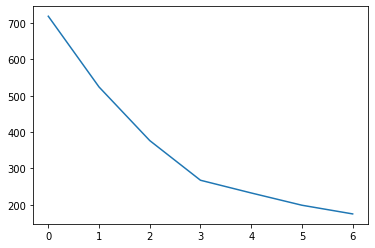

In [204]:
#we will plot the ssd and check the elbow curve
plt.plot(ssd)
plt.show()

Inference:
- Looking at the above elbow curve it looks good to proceed with either 3 or 4 clusters.
- Lets check the other technique to find the optimal cluster

# Silhouette Analysis

## Silhouette score=p-q/max(p,q)

### p is the mean distance to the point in the nearest cluster  that a data point is not a part of.

### q is the mean intra-cluster distance to all the points  in its own cluster.

- the value of the silhouette score range lies between -1 to 1.
- A score closer to 1 indicates that the datapoint is very similar to other data points in the cluster 
- A score closer to -1 indicates the datapoints is not similar to the data in its cluster.

In [205]:
#silhoette analysis
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    #initialising k means
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50,random_state=100)
    kmeans.fit(ngo_df_scaled)
    
    
    cluster_labels=kmeans.labels_
    
    #silhouette score
    silhouette_avg=silhouette_score(ngo_df_scaled,cluster_labels)
    print("For n_clusters={0},the silhouetee score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouetee score is 0.5376478231612195
For n_clusters=3,the silhouetee score is 0.4247864543786569
For n_clusters=4,the silhouetee score is 0.434259783823752
For n_clusters=5,the silhouetee score is 0.45696505257679676
For n_clusters=6,the silhouetee score is 0.3769007997710001
For n_clusters=7,the silhouetee score is 0.36561529794475467
For n_clusters=8,the silhouetee score is 0.37089279057075997


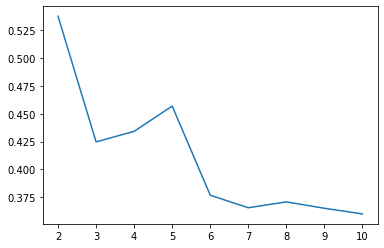

In [206]:
#plot the silhoutte score
ss=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=100).fit(ngo_df_scaled)
    ss.append([k,silhouette_score(ngo_df_scaled,kmeans.labels_)])
temp=pd.DataFrame(ss)
plt.plot(temp[0],temp[1])
plt.show()
    

We can see the plot and decide that the k=3 will go better even if we see the elbow curve we can conclude that k=3 makes the best  number of clusters and can give us the desired countries for our analysis.According to our dataset may be taking k=3 might give more refinely the countires with the urgent need of the aid. 

In [207]:
#final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=100)
kmeans.fit(ngo_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [208]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2])

In [209]:
#make a copy of the original dataframe
ngo_df_kmean=ngo_df.copy()
ngo_df_kmean.shape

(167, 10)

In [210]:
# Adding  the cluster labels in our original dataset

ngo_df_kmean['label']=kmeans.labels_
ngo_df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,22.243716,56.2,22.243716,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,22.243716,76.3,22.243716,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,22.243716,76.5,22.243716,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400000,60.1,22.243716,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,22.243716,76.8,22.243716,12200.0,0


In [211]:
# lets check the counts in each clusters 
ngo_df_kmean.label.value_counts()


0    85
2    55
1    27
Name: label, dtype: int64

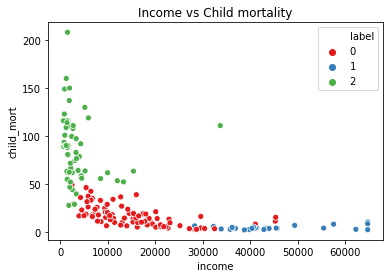

In [212]:
#lets plot the cluster plot to check the clusters formed
sns.scatterplot(x='income',y='child_mort',hue='label',data=ngo_df_kmean,palette='Set1')
plt.title("Income vs Child mortality")
plt.show()

- We can see that the countries having low income has high child mortal .
- Clusters 1 shows the lower child mortality  with the increase in the income 
- The cluster 2 has very high child mortality with low income may be we can say these countries in cluster 2 are in dire need of the aid .

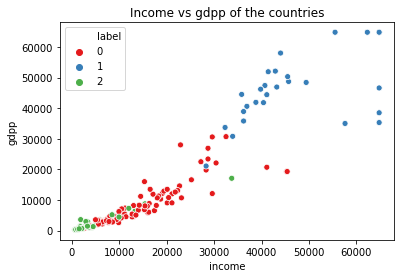

In [213]:
#lets plot the cluster plot to check the clusters formed
sns.scatterplot(x='income',y='gdpp',hue='label',data=ngo_df_kmean,palette='Set1')
plt.title("Income vs gdpp of the countries")
plt.show()

- Over here if we observe the plot we can say that the country having the lower income has ofcourse the lower gdpp indicating that they are in dire need of the aid.
- The cluster 0 and 2  shows lower gdppand also the lower income rate  among the three clusters but cluster 2 shows the lowest gdpp indicating poor countries 

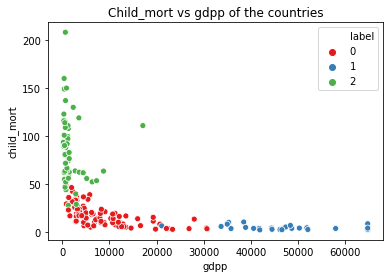

In [214]:
#lets also check the features gdpp vs child_mort
sns.scatterplot(x='gdpp',y='child_mort',hue='label',data=ngo_df_kmean,palette='Set1')
plt.title("Child_mort vs gdpp of the countries")
plt.show()

- We can see from the above clusters that the countries with the lower gdpp have higher child mortality rate that shows that these countires are need of help as in the aid

In [215]:
#checking the column again
ngo_df_kmean.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'label'],
      dtype='object')

### cluster profiling 


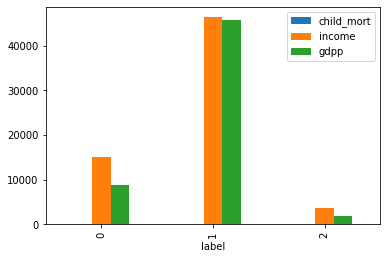

In [216]:
#ploting to see the cluster across the features child_mort,gdpp and income 

ngo_df_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('label').mean().plot(kind='bar')
plt.show()


- The above are the cluster centers for the various features.
- Child mortality is much smaller in scale compared to income and gdpp hence to verify the profile of child mortality against the cluster we will plot it separately and check.


In [217]:
# dropping the columns so that we can profile it better with the three features and analyse 
drop_col=ngo_df_kmean.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1)
drop_col.head()

,child_mort,income,gdpp,label
0,90.2,1610.0,553.0,2
1,16.6,9930.0,4090.0,0
2,27.3,12900.0,4460.0,0
3,119.0,5900.0,3530.0,2
4,10.3,19100.0,12200.0,0


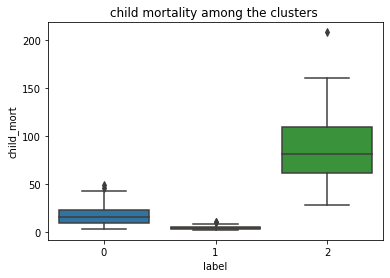

In [218]:
#lets plot these and check separately for child mortality
sns.boxplot(x="label",y="child_mort",data=drop_col)
plt.title("child mortality among the clusters ")
plt.show()

- We can see in the above plot that the cluster 2 has more of child mortality or say high mortality rate than other cluster 0 or 1.
- Child mortality indicates the Death of children under 5 years of age per 1000 live births so the cluster 2 is in more need of the aid.

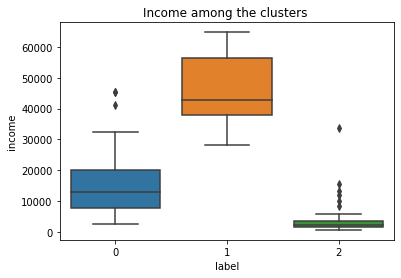

In [219]:
#lets plot these and check separately for income  mortality
sns.boxplot(x="label",y="income",data=drop_col)
plt.title("Income among the clusters ")
plt.show()

- The clusters in the above plot shows the income of the countries .
- The cluster 1 shows the very good income rate as compared to the cluster 0 and 2 .
- The cluster 2 is the least among the income and that shows the countries coming in the cluster 2 are still not developed and are in the dired need of aid .
- Lower income leads to many health issues as one may not be able to get nutritionnal food and the medical aid and so we can say such countires are yet to develop and thus we can provide them with the aid as priority

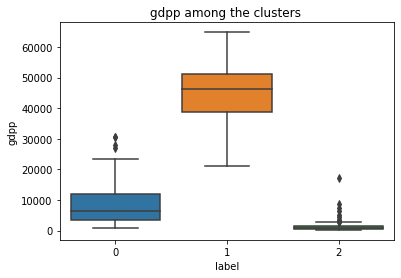

In [220]:
#lets plot these and check separately for gdpp
sns.boxplot(x="label",y="gdpp",data=drop_col)
plt.title("gdpp among the clusters ")
plt.show()

- gdpp growth rate is lower in the lower income countries .
- The developement of the countries of low gdpp are slower than the countries with the higher gdpp .
- looking at the above plot we can say that the countries with the lower gdpp are in the need of the aid .
- Countries in the cluster 2 shows the least gdpp so the cluster 2 are in the direst need of the aid.

In [221]:
# we will filter the dataset
#to see the cluster we have found with the lower gdpp , lower income and high child mortality
ngo_df_kmean[ngo_df_kmean["label"]==2]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300000,41.917400,248.297000,1610.0,22.243716,56.2,22.243716,553.0,2
3,Angola,119.0,2199.190000,100.605000,1514.370000,5900.0,22.400000,60.1,22.243716,3530.0,2
17,Benin,111.0,180.404000,31.078000,281.976000,1820.0,22.243716,61.8,22.243716,758.0,2
21,Botswana,52.5,2768.600000,527.050000,3257.550000,13300.0,22.243716,57.1,22.243716,6350.0,2
25,Burkina Faso,116.0,110.400000,38.755000,170.200000,1430.0,22.243716,57.9,22.243716,575.0,2
26,Burundi,93.6,22.243716,26.796000,90.552000,764.0,22.243716,57.7,22.243716,231.0,2
27,Cambodia,44.4,425.226000,44.644800,467.670000,2520.0,22.243716,66.1,22.243716,786.0,2
28,Cameroon,108.0,290.820000,67.203000,353.700000,2660.0,22.243716,57.3,22.243716,1310.0,2
31,Central African Republic,149.0,52.628000,22.243716,118.190000,888.0,22.243716,47.5,22.243716,446.0,2
32,Chad,150.0,330.096000,40.634100,390.195000,1930.0,22.243716,56.5,22.243716,897.0,2


In [222]:
# we can sort the data
kmean_final=ngo_df_kmean[ngo_df_kmean["label"]==2].sort_values(by=["child_mort","gdpp","income"],ascending=[False,True,True])
kmean_final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.744200,428.314,1500.0,22.243716,32.1,22.243716,662.0,2
132,Sierra Leone,160.0,67.032,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,2
32,Chad,150.0,330.096,40.634100,390.195,1930.0,22.243716,56.5,22.243716,897.0,2
31,Central African Republic,149.0,52.628,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,2
97,Mali,137.0,161.424,35.258400,248.508,1870.0,22.243716,59.5,22.243716,708.0,2
113,Nigeria,130.0,589.490,118.131000,405.420,5150.0,104.000000,60.5,22.243716,2330.0,2
112,Niger,123.0,77.256,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,2
3,Angola,119.0,2199.190,100.605000,1514.370,5900.0,22.400000,60.1,22.243716,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,2
25,Burkina Faso,116.0,110.400,38.755000,170.200,1430.0,22.243716,57.9,22.243716,575.0,2


#### we have the sorted countries those are in the dired need of the aid .
- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali
- Nigeria
- Niger 
- Angola
- Congo, Dem. Rep.
- Burkina Faso

## Hierarchical clustering

In [223]:
#we will use again the scaled data for the hierarchical clustering
ngo_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.565164,-0.572420,-0.898866,-0.117718,-1.619092,0.0,-0.724878
1,-0.538949,-0.473873,-0.439335,-0.398888,-0.393979,-0.117718,0.647866,0.0,-0.510164
2,-0.272833,-0.424015,-0.484946,-0.457479,-0.213749,-0.117718,0.670423,0.0,-0.487703
3,2.007808,-0.381264,-0.532486,-0.446113,-0.638533,-0.094327,-1.179234,0.0,-0.544159
4,-0.695634,-0.086754,-0.178874,0.119684,0.162488,-0.117718,0.704258,0.0,-0.017845


In [224]:
#keeping the copy of the scaled data
hierachical_scaled=ngo_df_scaled.copy()

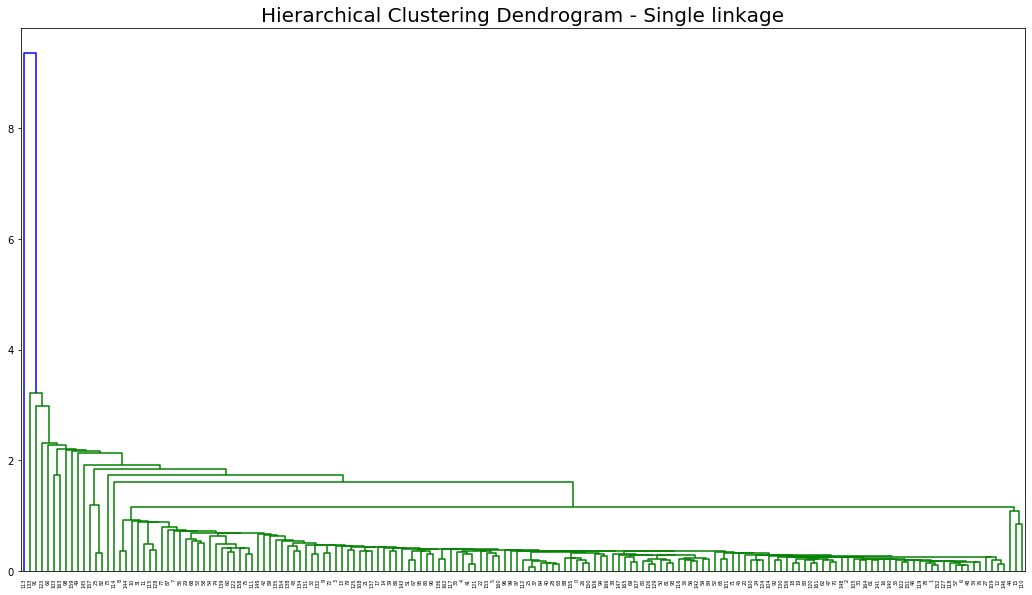

In [225]:
#single linkage
fig = plt.figure(figsize=(18,10))
plt.title('Hierarchical Clustering Dendrogram - Single linkage',fontsize=20)
mergings=linkage(hierachical_scaled,method="single",metric="euclidean")
dendrogram(mergings)
plt.show()

In single linkage takes the two closest point in the clusters and defines that as the distance so we are not able to read the result so we will try another type of linkage that is complete linkage .


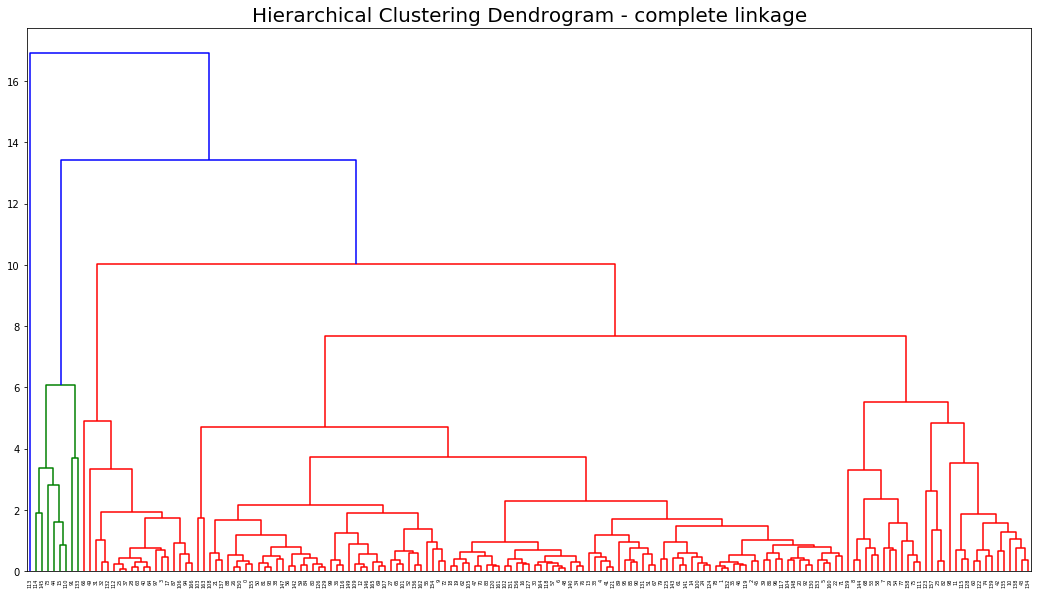

In [226]:
#complete linkage
fig = plt.figure(figsize=(18,10))
plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
mergings=linkage(hierachical_scaled,method="complete",metric="euclidean")
dendrogram(mergings,leaf_rotation=90)
plt.show()

In [227]:
# Applying k=3 clusters
cut_tree(mergings,n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [228]:
cut_tree(mergings,n_clusters=3).shape

(167, 1)

In [229]:
#reshape the array we wat the (167,1) in which the  1 should be removed
clusters_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)
clusters_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [230]:
ngo_df_hierachical=ngo_df.copy()

In [231]:
#assigning clusters labels to the dataset
ngo_df_hierachical["clusters_labels"]=clusters_labels
ngo_df_hierachical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,22.243716,56.2,22.243716,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,22.243716,76.3,22.243716,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,22.243716,76.5,22.243716,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400000,60.1,22.243716,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,22.243716,76.8,22.243716,12200.0,0


In [232]:
#checking the counts of the labels in our dataset
ngo_df_hierachical.clusters_labels.value_counts()

0    158
1      8
2      1
Name: clusters_labels, dtype: int64

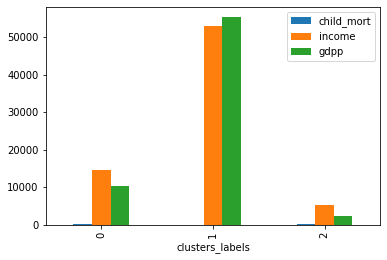

In [233]:
#ploting to see the cluster across the features child_mort,gdpp and income 

ngo_df_hierachical.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1).groupby('clusters_labels').mean().plot(kind='bar')
plt.show()

- The above are the cluster centers for the various features.
- Child mortality is much smaller in scale compared to income and gdpp hence to verify the profile of child mortality against the cluster we will plot it separately and check.
- If we see we can make out from the above plot that the cluster 2 shows the countries with the lower gdpp and income than other two clusters so cluster 2 shows the need of the aid .

lets check the features separatley and analyse it 


In [234]:
# dropping the columns so that we can profile it better with the three features and analyse 
drop_col=ngo_df_hierachical.drop(['country','exports','health','imports','inflation','life_expec','total_fer'],axis=1)
drop_col.head()

,child_mort,income,gdpp,clusters_labels
0,90.2,1610.0,553.0,0
1,16.6,9930.0,4090.0,0
2,27.3,12900.0,4460.0,0
3,119.0,5900.0,3530.0,0
4,10.3,19100.0,12200.0,0


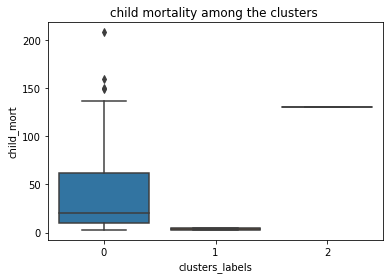

In [235]:
#lets plot these and check separately for child mortality
sns.boxplot(x="clusters_labels",y="child_mort",data=drop_col)
plt.title("child mortality among the clusters ")
plt.show()

- The above pot cluster 0 has many countries those have some high child mortality rate .
- the cluster 2 have only 1 country so not much is analysed from it but according to this plot it definitely looks like it has higher child mortality rate .we will decide at the end whether to include in the countries or not.

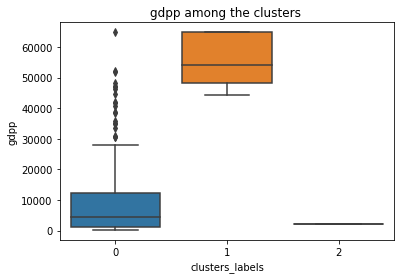

In [236]:
#lets plot these and check separately for gdpp
sns.boxplot(x="clusters_labels",y="gdpp",data=drop_col)
plt.title("gdpp among the clusters ")
plt.show()

- the above plot cluster 1 shows clearly that the countries belonging to this clusters have high gdpp so they definitely not in the dired need of the aid .
- The cluster 2 doesnt give a very clear pic but the country belonging to that cluster 2 has low gdpp but we will look into the value and decide on later .
- Cluster 0 has many countries with the low gdpp but due to few countries have high gdpp we can observe few outliers in the clusters 0 we will analyse it later by sorting the countries and decide on it .

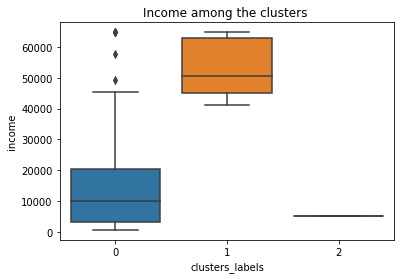

In [237]:
#lets plot these and check separately for income  mortality
sns.boxplot(x="clusters_labels",y="income",data=drop_col)
plt.title("Income among the clusters ")
plt.show()

- The plot above shows the maximun countries in the cluster 0 with low income .
- The cluster 1 shows maximum countries with high income so we can say that these countries with higher income might have less need of the financial aid. We will not consider it.
- The cluster 2 has one country in it which shows less income but we will observe other parameters and decide on to consider this country. 

In [238]:
# we will filter the dataset
#to see the cluster we have found with the lower gdpp , lower income and high child mortality
final_hierarch=ngo_df_hierachical[ngo_df_hierachical["clusters_labels"]==0].sort_values( by=["child_mort","gdpp","income"],ascending=[False,True,True])
final_hierarch.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
66,Haiti,208.0,101.286,45.744200,428.314,1500.0,22.243716,32.1,22.243716,662.0,0
132,Sierra Leone,160.0,67.032,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,0
32,Chad,150.0,330.096,40.634100,390.195,1930.0,22.243716,56.5,22.243716,897.0,0
31,Central African Republic,149.0,52.628,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,0
97,Mali,137.0,161.424,35.258400,248.508,1870.0,22.243716,59.5,22.243716,708.0,0
112,Niger,123.0,77.256,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,0
3,Angola,119.0,2199.190,100.605000,1514.370,5900.0,22.400000,60.1,22.243716,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,0
25,Burkina Faso,116.0,110.400,38.755000,170.200,1430.0,22.243716,57.9,22.243716,575.0,0
64,Guinea-Bissau,114.0,81.503,46.495000,192.544,1390.0,22.243716,55.6,22.243716,547.0,0


#### Similarity:
- After sorting the final countries by the same features obtained by the hierarchical clustering  as we did for K-mean we get ther same countries suggesting us to think on for the need of the aid . 
- we will decide on the countries once we look at the cluster 2 country.

In [239]:
#### Final countries obtained from the Hierarchical clustering


In [240]:
#checking the cluster 2 country to decide on for the final countries .
ngo_df_hierachical[ngo_df_hierachical["clusters_labels"]==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,22.243716,2330.0,2


- The country in this cluster 2 is Nigeria .
- Though this country is one among the poorest country in need of the aid we will still look at the other cluster for clear picture. 
- If we observe closely we notice that the this country has the good gdpp rate and also has a good health rate too but not as compare to the other countries.
- This country also has good income but compare to higher income country still it need a lot of development. the child mortality rate doesnt seems too good as its higher but again this feature cannot solely be considered for the need of the aid.
- The child mortality may be possible due to some other reason.
- Heirarchical clustering is not helping us to decide on this country so we will not consider this country into the need of the aid looking at the other features from the hierarchical clustering point of view but we may consider this country through k-mean clustering.

In [241]:
#shape of the cluster which we selected 
ngo_df_hierachical[ngo_df_hierachical["clusters_labels"]==0].shape

(158, 11)

# Final analysis


#### K-mean dataset analysis

In [242]:
#checking the shape of the k-mean clustered dataset 
kmean_final.shape

(55, 11)

In [243]:
#checking  the statistical values of the dataset k-mean dataset with the cluster 
kmean_final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.0
mean,86.520000,850.668597,109.601916,827.712558,3733.690909,23.883378,60.174545,2.224372e+01,1852.109091,2.0
std,34.946898,2137.596666,156.788100,1470.130941,5157.761522,11.024601,6.489028,2.868367e-14,2753.574342,0.0
min,28.100000,22.243716,22.243716,22.243716,609.000000,22.243716,32.100000,2.224372e+01,231.000000,2.0
25%,62.200000,102.497500,33.329850,197.669000,1415.000000,22.243716,57.200000,2.224372e+01,562.500000,2.0
50%,81.000000,196.344000,50.958000,365.850000,2090.000000,22.243716,60.700000,2.224372e+01,967.000000,2.0
75%,110.000000,564.845000,97.070500,867.600000,3545.000000,22.243716,64.950000,2.224372e+01,1470.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,2.224372e+01,17100.000000,2.0


In [244]:
#checking the countries having 75% than above the  child mortality 
final_childmort=kmean_final[kmean_final["child_mort"]>110]
final_childmort.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.744200,428.314,1500.0,22.243716,32.1,22.243716,662.0,2
132,Sierra Leone,160.0,67.032,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,2
32,Chad,150.0,330.096,40.634100,390.195,1930.0,22.243716,56.5,22.243716,897.0,2
31,Central African Republic,149.0,52.628,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,2
97,Mali,137.0,161.424,35.258400,248.508,1870.0,22.243716,59.5,22.243716,708.0,2
113,Nigeria,130.0,589.490,118.131000,405.420,5150.0,104.000000,60.5,22.243716,2330.0,2
112,Niger,123.0,77.256,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,2
3,Angola,119.0,2199.190,100.605000,1514.370,5900.0,22.400000,60.1,22.243716,3530.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,2
25,Burkina Faso,116.0,110.400,38.755000,170.200,1430.0,22.243716,57.9,22.243716,575.0,2


In [245]:
#checking the countries having lower than 25% of the income 
final_income=kmean_final[kmean_final["income"]<1500]
final_income.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
132,Sierra Leone,160.0,67.032000,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,2
31,Central African Republic,149.0,52.628000,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,2
112,Niger,123.0,77.256000,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,2
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,2
25,Burkina Faso,116.0,110.400000,38.755000,170.200,1430.0,22.243716,57.9,22.243716,575.0,2
64,Guinea-Bissau,114.0,81.503000,46.495000,192.544,1390.0,22.243716,55.6,22.243716,547.0,2
63,Guinea,109.0,196.344000,31.946400,279.936,1190.0,22.243716,58.0,22.243716,648.0,2
106,Mozambique,101.0,131.985000,22.243716,193.578,918.0,22.243716,54.5,22.243716,419.0,2
26,Burundi,93.6,22.243716,26.796000,90.552,764.0,22.243716,57.7,22.243716,231.0,2
94,Malawi,90.5,104.652000,30.248100,160.191,1030.0,22.243716,53.1,22.243716,459.0,2


In [246]:
#checking the countries having lower than 25% of the gdpp 
final_gdpp=kmean_final[kmean_final["gdpp"]<562]
final_gdpp.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
132,Sierra Leone,160.0,67.032000,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,2
31,Central African Republic,149.0,52.628000,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,2
112,Niger,123.0,77.256000,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,2
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,2
64,Guinea-Bissau,114.0,81.503000,46.495000,192.544,1390.0,22.243716,55.6,22.243716,547.0,2
106,Mozambique,101.0,131.985000,22.243716,193.578,918.0,22.243716,54.5,22.243716,419.0,2
26,Burundi,93.6,22.243716,26.796000,90.552,764.0,22.243716,57.7,22.243716,231.0,2
94,Malawi,90.5,104.652000,30.248100,160.191,1030.0,22.243716,53.1,22.243716,459.0,2
150,Togo,90.3,196.176000,37.332000,279.624,1210.0,22.243716,58.7,22.243716,488.0,2
0,Afghanistan,90.2,55.300000,41.917400,248.297,1610.0,22.243716,56.2,22.243716,553.0,2


#### Hierarchical clustering dataset analysis

In [247]:
#checking the shape of the clustered dataset
final_hierarch.shape

(158, 11)

In [248]:
#checking the statistical values of the dataset
final_hierarch.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,1.580000e+02,158.000000,158.0
mean,39.433544,4617.325714,807.937051,4255.259967,14643.644177,22.557602,70.091772,2.224372e+01,10391.001646,0.0
std,40.052683,6991.382326,1352.107068,5507.037943,14572.280354,2.338971,8.785106,4.633213e-14,13665.058632,0.0
min,2.600000,22.243716,22.243716,22.243716,609.000000,22.243716,32.100000,2.224372e+01,231.000000,0.0
25%,10.225000,428.284500,67.989000,571.837500,3290.000000,22.243716,64.775000,2.224372e+01,1310.000000,0.0
50%,20.500000,1694.255000,287.176500,1903.875000,9890.000000,22.243716,72.300000,2.224372e+01,4520.000000,0.0
75%,62.200000,5872.675000,832.717500,6182.725000,20325.000000,22.243716,76.475000,2.224372e+01,12175.000000,0.0
max,208.000000,43796.900000,8663.600000,32494.000000,64794.260000,45.900000,82.800000,2.224372e+01,64794.260000,0.0


In [249]:
#checking the countries having 75% above the  child mortality 
final_hierarchy_mort=final_hierarch[final_hierarch["child_mort"]>62]
final_hierarchy_mort.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
66,Haiti,208.0,101.286,45.744200,428.314,1500.0,22.243716,32.1,22.243716,662.0,0
132,Sierra Leone,160.0,67.032,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,0
32,Chad,150.0,330.096,40.634100,390.195,1930.0,22.243716,56.5,22.243716,897.0,0
31,Central African Republic,149.0,52.628,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,0
97,Mali,137.0,161.424,35.258400,248.508,1870.0,22.243716,59.5,22.243716,708.0,0
112,Niger,123.0,77.256,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,0
3,Angola,119.0,2199.190,100.605000,1514.370,5900.0,22.400000,60.1,22.243716,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,0
25,Burkina Faso,116.0,110.400,38.755000,170.200,1430.0,22.243716,57.9,22.243716,575.0,0
64,Guinea-Bissau,114.0,81.503,46.495000,192.544,1390.0,22.243716,55.6,22.243716,547.0,0


In [250]:
#checking the countries having lower than 25% of the gdpp 
final_hierarchy_gdpp=final_hierarch[final_hierarch["gdpp"]<1310]
final_hierarchy_gdpp.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_labels
66,Haiti,208.0,101.286,45.744200,428.314,1500.0,22.243716,32.1,22.243716,662.0,0
132,Sierra Leone,160.0,67.032,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,0
32,Chad,150.0,330.096,40.634100,390.195,1930.0,22.243716,56.5,22.243716,897.0,0
31,Central African Republic,149.0,52.628,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,0
97,Mali,137.0,161.424,35.258400,248.508,1870.0,22.243716,59.5,22.243716,708.0,0
112,Niger,123.0,77.256,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,0
25,Burkina Faso,116.0,110.400,38.755000,170.200,1430.0,22.243716,57.9,22.243716,575.0,0
64,Guinea-Bissau,114.0,81.503,46.495000,192.544,1390.0,22.243716,55.6,22.243716,547.0,0
17,Benin,111.0,180.404,31.078000,281.976,1820.0,22.243716,61.8,22.243716,758.0,0


In [251]:
#checking the countries having lower than 25% of the income 
final_income=kmean_final[kmean_final["income"]<3290]
final_income.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.744200,428.314,1500.0,22.243716,32.1,22.243716,662.0,2
132,Sierra Leone,160.0,67.032,52.269000,137.655,1220.0,22.243716,55.0,22.243716,399.0,2
32,Chad,150.0,330.096,40.634100,390.195,1930.0,22.243716,56.5,22.243716,897.0,2
31,Central African Republic,149.0,52.628,22.243716,118.190,888.0,22.243716,47.5,22.243716,446.0,2
97,Mali,137.0,161.424,35.258400,248.508,1870.0,22.243716,59.5,22.243716,708.0,2
112,Niger,123.0,77.256,22.243716,170.868,814.0,22.243716,58.8,22.243716,348.0,2
37,"Congo, Dem. Rep.",116.0,137.274,26.419400,165.664,609.0,22.243716,57.5,22.243716,334.0,2
25,Burkina Faso,116.0,110.400,38.755000,170.200,1430.0,22.243716,57.9,22.243716,575.0,2
64,Guinea-Bissau,114.0,81.503,46.495000,192.544,1390.0,22.243716,55.6,22.243716,547.0,2
17,Benin,111.0,180.404,31.078000,281.976,1820.0,22.243716,61.8,22.243716,758.0,2


# Conclusion


### K-Means vs Hierarchical Clustering

#### K-means clustering :
##### Countries that are direst need of aid

- Total 55 countries are in this category 
- We will consider this now ignoring the countries of the other clusters as we are only concentrating on the countries with poor socio economic factor.

#### Hierarchical clustering
#####  Countries that are in the direst need of the aid 
- We have total 158 countires in this category.
- There are 103 countires more 
- we  analysed and came to conclusion to keep the similar countries as suggested by the k-mean clustering too



We have seen from both methods - (K-Means and Hierarchical clustering) that extra 103 countries are being selected from hierarchical clustering.
#### I would choose the final countries from k-means clustering as it gave accurate output than hierarchical clustering.(keep the common countries atmost)
- I have compared the clusters and visualized from both methods and K-means gave precise information than hierarchical clustering but as both the clustering shows same countries except one we will go ahead with the countries in K-mean clustering.
#### Even though keep the countries common in both more preference for the countries from the k mean cluster as they exhibit the neat behaviour

### final countries from k-mean clustering + Hierarchical clustering 
- Haiti
- Sierra Leone
- Chad
- Central African Republic
- Mali
- Nigeria
- Niger 
- Angola
- Congo, Dem. Rep.
- Burkina Faso
